In [2]:
from __future__ import division
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

churn_df = pd.read_csv('data\churn.csv')
churn_df.head()
churn_df.replace('no',False,inplace=True)
churn_df.replace('yes',True,inplace=True)
churn_df.replace('False.',False,inplace=True)
churn_df.replace('True.',True,inplace=True)
churn_df = churn_df.drop('State',1)
churn_df = churn_df.drop('Area Code',1)
churn_df = churn_df.drop('Phone',1)

X = StandardScaler().fit_transform(churn_df.iloc[:,0:-1])
y = churn_df.iloc[:,-1]

churn_df.head()

,Account Length,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,128,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


0.00250759883497


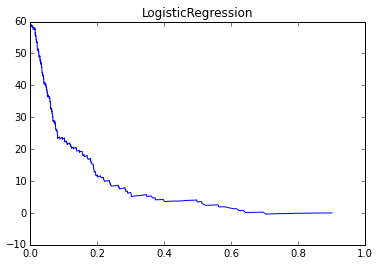

0.00211019083253


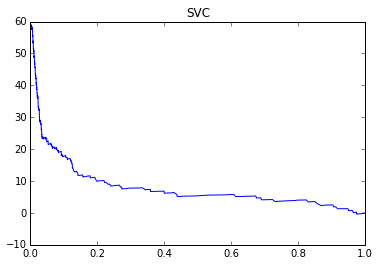

0.0


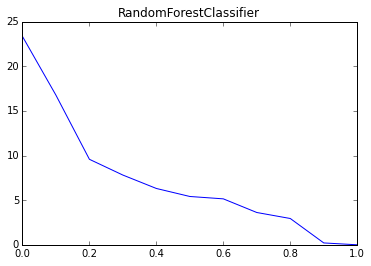

In [3]:
def confusion_rates(con_mat):
    tpr = con_mat[0,0]/(con_mat[0,0] + con_mat[1,0])
    fpr = con_mat[0,1]/(con_mat[0,1] + con_mat[1,1])
    fnr = con_mat[1,0]/(con_mat[0,0] + con_mat[1,0])
    tnr = con_mat[1,1]/(con_mat[1,1] + con_mat[0,1])
    return np.array([[tpr,fpr],[fnr,tnr]])

def profit_curve(clflist, cb, X_train, y_train, X_test, y_test):
#     pos = np.sum(y_test == 1) / len(y_test)
#     neg = len(y_test) - pos
#     class_probs = np.array([pos,neg])
    for clf in clflist:
        clf.fit(X_train, y_train)
        if clf.classes_[0] == False:
            classindex = 1
        else:
            classindex = 0
        prob = np.sort(clf.predict_proba(X_test),axis=0)
        profit = []
        for i in prob:
            yhat = np.greater(prob[:,classindex],i[classindex])
            cm = confusion_matrix(y_test,yhat)
            ourcm = np.array([[cm[1,1],cm[0,1]],[cm[1,0],cm[0,0]]])
            profit.append(np.sum(confusion_rates(ourcm)*cb))
        print prob[np.argmax(profit),classindex]
        plt.plot(prob[:,classindex],profit)
        plt.title(clf.__class__.__name__)
        plt.show()
        
clflist = [LogisticRegression(),SVC(probability=True),
           RandomForestClassifier()]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
CB = np.array([[79,-20],[0,0]])

profit_curve(clflist,CB, X_train, y_train, X_test, y_test)

# confusion_rates(CB)

#### 7 : Limited Budget would be a random forest classifier; it limits us to a smaller portion of the population. Unlimited would be the logistic regression, it targets a larger portion of the population. These things apply with the caveat of my cost benefit values above